# Аналитика в Яндекс.Афиши

## 1. Общая информация

Заказчик - маркетологи отдела Яндекс.Афиши. Задача - оптимизировать маркетинговые затраты, а для этого нужно посчитайте различные метрики:ROI,LTV и другие.

Для анализа доступны следующие таблицы: визиты, заказы и расходы. Столбцы содержат о себе следующую информацию: Uid — уиникальный идентификатор пользователя; Device — категория устройства пользователя; Start Ts — дата и время начала сессии;End Ts — дата и время окончания сессии; Source Id — идентификатор рекламного источника, из которого пришел пользователь; Buy Ts — дата и время заказа; Revenue — выручка Яндекс.Афиши с этого заказа; dt — дата объявления рекламы; costs — затраты на этот рекламный источник в этот день.

In [2]:
#для чтения файла и дальнейшей работы с ним импортируем библиотеку pandas
#так как наш файл формата .csv, то применяем метод read_csv(),
#сохраняем таблицу о визитах в переменную visits (англ. «визиты»)
import pandas as pd
visits=pd.read_csv('/datasets/visits_log.csv')
#для  изучения общей информации воспольуемся методом info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#сохраняем таблицу о заказах в переменную orders (англ. «заказы»)
orders=pd.read_csv('/datasets/orders_log.csv')
#для  изучения общей информации воспольуемся методом info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
#сохраняем таблицу о затратах на маркетинг в переменную costs (англ. «затраты»)
costs=pd.read_csv('/datasets/costs.csv')
#для  изучения общей информации воспольуемся методом info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Вывод

В талбцах нет никаких пропусков и это хорошо, однако тип данных солбцов, где указано время и дата, не соответсвует datetime. Также столбцы таблиц visits и orders следует переименовать для удобства работы. 

## 2. Предобработка данных

In [8]:
#применим метод pd.to_datetime() к стобцам 'Start Ts','End Ts','Buy Ts' и 'dt', чтобы привести столбцы к типу datetime 
visits['Start Ts']=pd.to_datetime(visits['Start Ts'])
visits['End Ts']=pd.to_datetime(visits['End Ts'])
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])
costs['dt']=pd.to_datetime(costs['dt'])

In [9]:
#метод .columns() позволит переименовать все наименования столбцов
visits.columns=['device' , 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns=['buy_ts' , 'revenue', 'uid']

## 3. Исследовательский анализ данных

### Продукт

В любом бизнесе важно знать общую активности пользователей, то есть нужно найти сколько людей в день, неделю, месяц пользуются  нашим продуктом. Причем нужны уникальные пользователи, так как это показатель того, что продуктом интересуются не только те, кто с ним уже знаком.  

Для это вначале выделим в отдельные столбцы год, месяц и неделю, а также полную дату совершенной сессии методами dt.year/month/week/date.

In [9]:
visits['session_year']  =visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


##### dau, mau и wau
Посчитаем метрики dau, mau и wau. Сгруппируем данные методом df.groupby([столбец интересующей нас метрики]) по уникальным пользователям, которые найдем методом nunique, и посчитаем среднее.

In [10]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('количество уникальных пользователей в день: ',int(dau_total))
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('количество уникальных пользователей в неделю: ',int(wau_total))
mau_total=visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
print('количество уникальных пользователей в месяц: ',int(mau_total))

количество уникальных пользователей в день:  907
количество уникальных пользователей в неделю:  5716
количество уникальных пользователей в месяц:  23228


Так же посчитаем регулярность использования приложения — то есть, как часто пользователи к нему обращаются. Формулы расчёта такой метрики: sticky_wau = DAU/WAU или sticky_mau = DAU/MAU

In [11]:
sticky_mau=dau_total/mau_total*100
sticky_wau=dau_total/wau_total*100
print('регулярность использования приложения в неделю: ', sticky_wau, 
      'регулярность использования приложения в течении месяца: ', sticky_mau, sep='\n')

регулярность использования приложения в неделю: 
uid    15.884409
dtype: float64
регулярность использования приложения в течении месяца: 
uid    3.90897
dtype: float64


(736481.0, 736845.0)

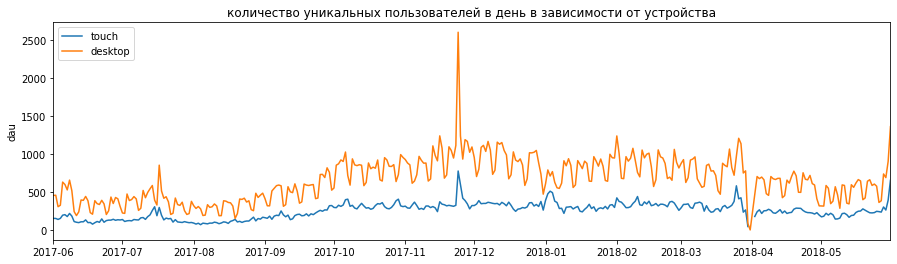

In [12]:
#строим сводную таблицу по устройствам и рассчитываем метрику dau 
dau_device=visits.pivot_table(values='uid', index='device', columns='session_date', aggfunc= 'nunique')
#импортируем matplotlib.pyplot для постройки графиков
import matplotlib.pyplot as plt
#задаём область графическую
fig, ax = plt.subplots(figsize=(15, 4)) 
#будем строить графики на одной области, для этого создаём цикл по устройствам, типы устройст опредяем методом .unique()
for device in visits['device'].unique() :
    #х- даты сессий, выделяем их методом .columns
    x=dau_device.columns
    #у- число уникальных пользователей в день для определенного типа устройства
    y=dau_device[dau_device.index == device].values[0]
    ax.plot(x, y, label=device)  
ax.set_title('количество уникальных пользователей в день в зависимости от устройства')
ax.legend(loc='upper left')
ax.set_ylabel('dau')
ax.set_xlim(xmin=dau_device.columns[0], xmax=dau_device.columns[-1])

In [13]:
print('desktop', dau_device.loc['desktop',pd.to_datetime('2017-11-20'):pd.to_datetime('2017-12-01')])
print('touch',dau_device.loc['touch',pd.to_datetime('2017-11-20'):pd.to_datetime('2017-12-01')])

desktop session_date
2017-11-20    1096.0
2017-11-21    1048.0
2017-11-22     948.0
2017-11-23    1115.0
2017-11-24    2605.0
2017-11-25    1240.0
2017-11-26     934.0
2017-11-27    1190.0
2017-11-28    1167.0
2017-11-29    1024.0
2017-11-30    1094.0
2017-12-01     955.0
Name: desktop, dtype: float64
touch session_date
2017-11-20    325.0
2017-11-21    319.0
2017-11-22    312.0
2017-11-23    325.0
2017-11-24    777.0
2017-11-25    597.0
2017-11-26    419.0
2017-11-27    388.0
2017-11-28    344.0
2017-11-29    278.0
2017-11-30    322.0
2017-12-01    322.0
Name: touch, dtype: float64


(736481.0, 736845.0)

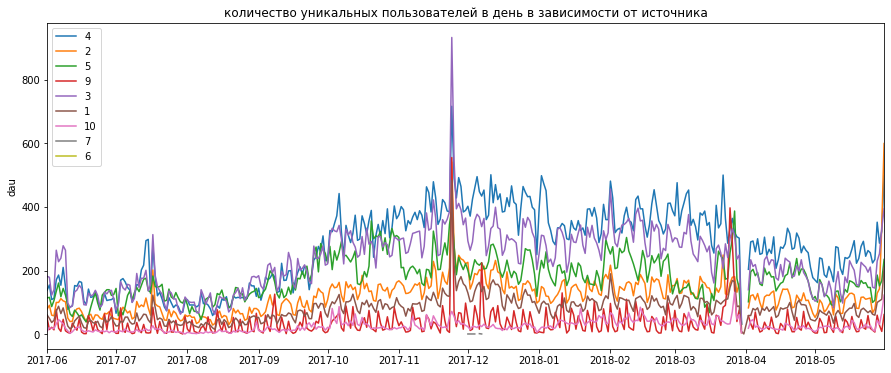

In [14]:
# аналогично рассужденим выше строим сводную таблицу по источника и рассчитываем метрику dau 
dau_source=visits.pivot_table(values='uid', index='source_id', columns='session_date', aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(15, 6))  
for source in visits['source_id'].unique() :
    x=dau_source.columns
    y=dau_source[dau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество уникальных пользователей в день в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('dau')
ax.set_xlim(xmin=dau_source.columns[0], xmax=dau_source.columns[-1])

(1, 22)

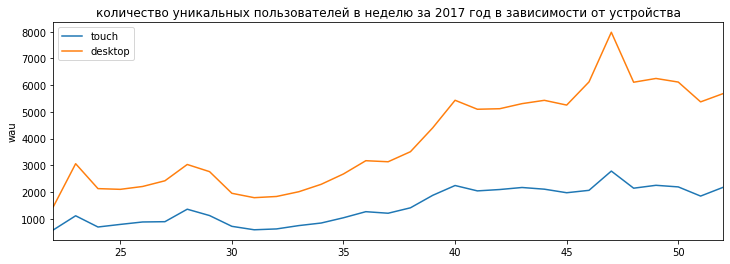

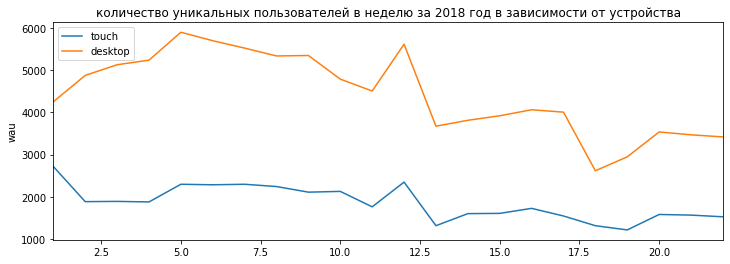

In [15]:
#строим сводную таблицу по устройствам и рассчитываем метрику wau
#однако ввиду разбивки по годам отдельно строим графики за 2017 и 2018 года 
wau_device=visits[visits['session_year']==2017].pivot_table(values='uid', index='device', columns=['session_week'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for device in visits['device'].unique() :
    x=wau_device.columns
    y=wau_device[wau_device.index == device].values[0]
    ax.plot(x, y, label=device)  
ax.set_title('количество уникальных пользователей в неделю за 2017 год в зависимости от устройства')
ax.legend(loc='upper left')
ax.set_ylabel('wau')
ax.set_xlim(xmin=wau_device.columns[0], xmax=wau_device.columns[-1])
wau_device=visits[visits['session_year']==2018].pivot_table(values='uid', index='device', columns=['session_week'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for device in visits['device'].unique() :
    x=wau_device.columns
    y=wau_device[wau_device.index == device].values[0]
    ax.plot(x, y, label=device)  
ax.set_title('количество уникальных пользователей в неделю за 2018 год в зависимости от устройства')
ax.legend(loc='upper left')
ax.set_ylabel('wau')
ax.set_xlim(xmin=wau_device.columns[0], xmax=wau_device.columns[-1])

(1, 22)

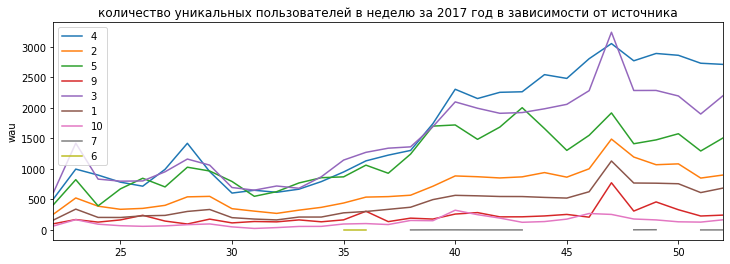

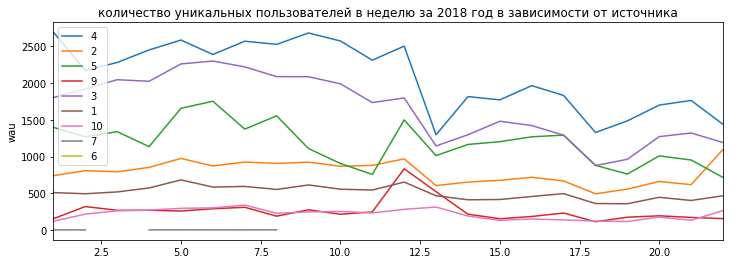

In [16]:
wau_source=visits[visits['session_year']==2017].pivot_table(values='uid', index='source_id', columns=['session_week'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in visits['source_id'].unique() :
    x=wau_source.columns
    y=wau_source[wau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество уникальных пользователей в неделю за 2017 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('wau')
ax.set_xlim(xmin=wau_source.columns[0], xmax=wau_source.columns[-1])
wau_source=visits[visits['session_year']==2018].pivot_table(values='uid', index='source_id', columns=['session_week'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in visits['source_id'].unique() :
    x=wau_source.columns
    y=wau_source[wau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество уникальных пользователей в неделю за 2018 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('wau')
ax.set_xlim(xmin=wau_source.columns[0], xmax=wau_source.columns[-1])

(1, 5)

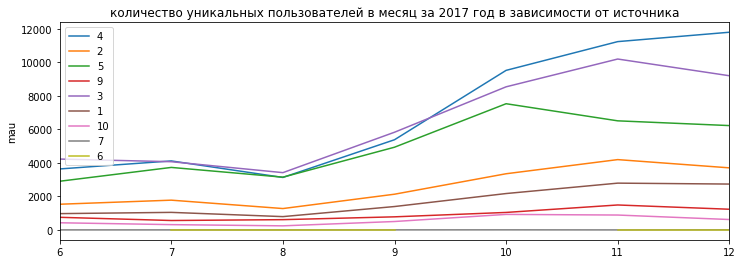

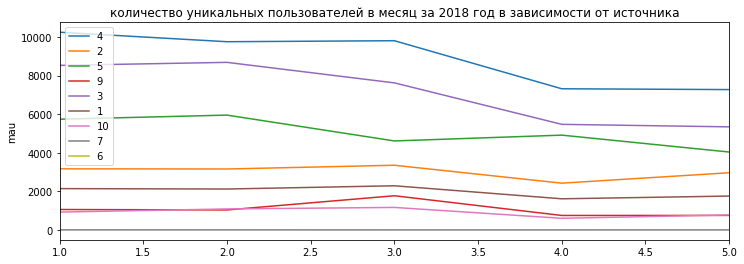

In [17]:
mau_source=visits[visits['session_year']==2017].pivot_table(values='uid', index='source_id', columns=['session_month'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in visits['source_id'].unique() :
    x=mau_source.columns
    y=mau_source[mau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество уникальных пользователей в месяц за 2017 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('mau')
ax.set_xlim(xmin=mau_source.columns[0], xmax=mau_source.columns[-1])
mau_source=visits[visits['session_year']==2018].pivot_table(values='uid', index='source_id', columns=['session_month'], aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in visits['source_id'].unique() :
    x=mau_source.columns
    y=mau_source[mau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество уникальных пользователей в месяц за 2018 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('mau')
ax.set_xlim(xmin=mau_source.columns[0], xmax=mau_source.columns[-1])

##### количество сессий за  день
Также узнаем cколько сессий за день пользователи совершают в общем.

In [18]:
visits_day=visits.groupby('session_date').agg({'start_ts':'nunique'})

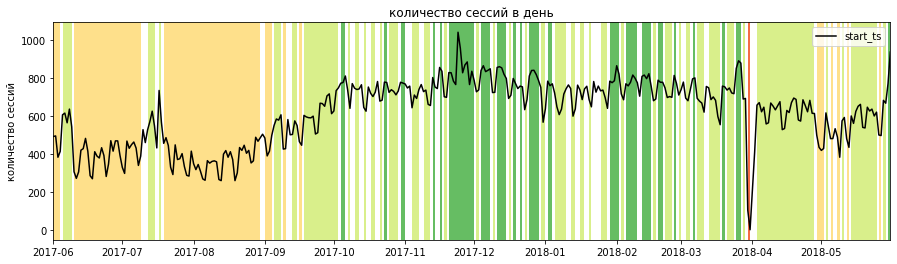

In [19]:
import matplotlib.transforms as mtransforms
import numpy as np
#задаём цветовую гамму чтобы построить цветовую карту 
cmap = plt.get_cmap('RdYlGn')
#строим график посещений в зависимости от дня сессий
visits_day.plot(color='black', linewidth=1.5, marker='', figsize=(15, 4))
#используем cut для сегментирования и сортировки значения данных в ячейки
state = pd.cut(
    visits_day['start_ts'], bins=[-np.inf, 250, 500, 750, np.inf], labels=range(4))
#при помощи ax = plt.gca() получаем отсылку к текущему объекту Axes
ax = plt.gca() 
ax.set_title('количество сессий в день')
ax.set_ylabel('количество сессий')
ax.set_xlabel('')
ax.grid(False)
ax.set_xlim(xmin=visits_day.index[0], xmax=visits_day.index[-1])
#преобразуем координаты
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
#cmap([0.2, 0.4, 0.6, 0.8])- хотим получить последовательно RGBA в 20-х, 40-х, 60-х и 80-х «перцентилях» в спектре цветовой
#гаммы». Так же мы используем enumerate(), так как нам нужно сопоставить каждый цвет с состоянием. 
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    #закрашиваем область между двумя указанными линиями
    ax.fill_between(visits_day.index, 0, 1, where=state == i,
                    facecolor=color, transform=trans)

(736481.0, 736845.0)

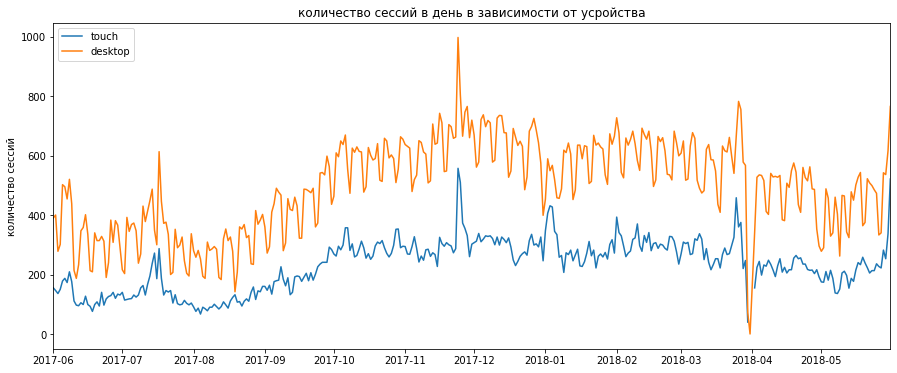

In [20]:
visits_day_device=visits.pivot_table(values='start_ts', index='device', columns='session_date', aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(15, 6))  
for device in visits['device'].unique() :
    x=visits_day_device.columns
    y=visits_day_device[visits_day_device.index == device].values[0]
    ax.plot(x, y, label=device)  
ax.set_title('количество сессий в день в зависимости от усройства')
ax.legend(loc='upper left')
ax.set_ylabel('количество сессий')
ax.set_xlim(xmin=visits_day_device.columns[0], xmax=visits_day_device.columns[-1])

(736481.0, 736845.0)

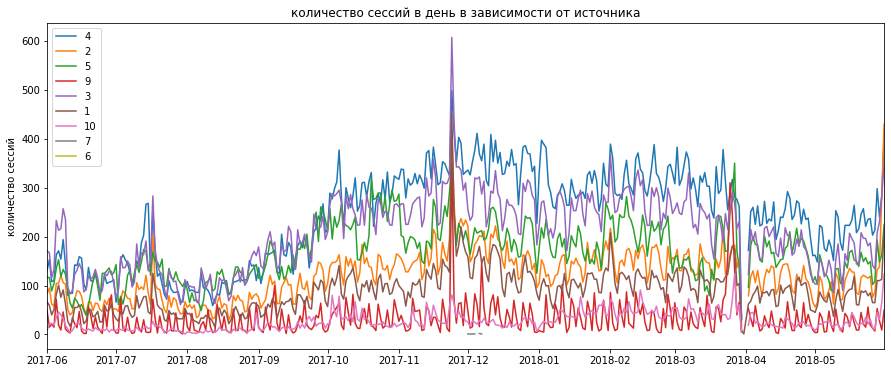

In [21]:
visits_day_source=visits.pivot_table(values='start_ts', index='source_id', columns='session_date', aggfunc= 'nunique')
fig, ax = plt.subplots(figsize=(15, 6))  
for source in visits['source_id'].unique() :
    x=visits_day_source.columns
    y=visits_day_source[visits_day_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('количество сессий в день в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('количество сессий')
ax.set_xlim(xmin=visits_day_source.columns[0], xmax=visits_day_source.columns[-1])

##### сколько сессий приходится на одного пользователя в день
Полезно изучить и то, сколько сессий приходится на одного пользователя в день. Это хороший показатель регулярности использования приложения. Для этого разделим число сессий на количество пользователей за период.

In [22]:
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].mean()

1.082169644003972

В день один пользователь в среднем проводит в приложении максимум 1 сессию. Что в принципе нормально, ведь мы хотим раз в день что-то купить. А проверим теперь, как обстоят дела в течении месяца.

In [23]:
sessions_per_user =  visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].mean()

1.2808894945992668

Так же видно, что в месяц один пользователь в среднем проводит в приложении максимум 1 сессию. То есть  сложно сказать, что продукт используется регулярно.

##### продолжительность сессии
Теперь мы знаем сколько пользователей заходит в Яндекс.Афиша. Хорошо бы ещё получить информацию, как долго они там проводят время. Рассчитаем среднюю продолжительность сессии или ASL, как длину всех сессий и вычислим среднее: конец сессии - начало сессии, переведем всё в секунды и найдем среднее методом df.mean().

Cредняя продолжительность сессии  643.506488592098


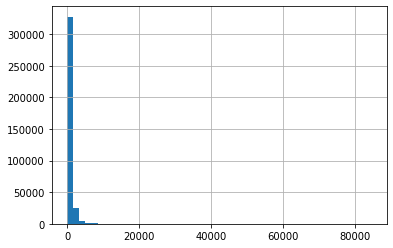

In [24]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Cредняя продолжительность сессии ', visits['session_duration_sec'].mean())
visits['session_duration_sec'].hist(bins=50)

Однако наше распределение далеко от нормального, поэтому рассчитаем моду:

In [25]:
print('Cредняя продолжительность сессии ', visits['session_duration_sec'].mode())

Cредняя продолжительность сессии  0    60
dtype: int64


Видно,что сессия довольна короткая, примерно минута. Попробуем найти причину этого явления: может сайт плохо отображается в мобильной версии?

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0, 2100)

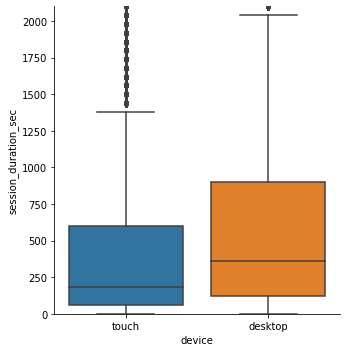

In [26]:
import seaborn as sns
sns.catplot(x='device', y='session_duration_sec', kind =  "box", data=visits)
plt.ylim(0, 2100)

(0, 2100)

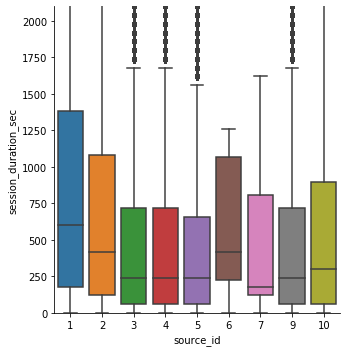

In [27]:
sns.catplot(x='source_id', y='session_duration_sec', kind =  "box", data=visits)
plt.ylim(0, 2100)

##### Rotatiom Rate
Последний вопрос, который осталось рассмотреть это удержание людей. Для этого нам нужно рассчитать Retention Rate. 

In [28]:
#Сгруппируем данные по столбцу 'uid' методом groupby(). Для каждого клиента получим дату первого заказа— ['session_date'].min()
first_visits_date = visits.groupby('uid')['session_date'].min()
#Чтобы в датафрейме не было двух столбцов с одинаковыми названиями, изменим имя на first_visits_date, обратившись к name Series.
first_visits_date.name = 'first_visits_date'
#Методом join() объединим датафрейм visits и Series first_visits_date по столбцу 'uid'
visits_cogort= visits.join(first_visits_date,on='uid')
#Выделим из столбцов first_visits_date и 'session_date' месяцы.Вызовем astype(): преобразуем столбцы к типу 'datetime64[M]'. 
visits_cogort['first_visits_month'] = visits_cogort['first_visits_date'].astype('datetime64[M]')
visits_cogort['visits_month'] = visits_cogort['session_date'].astype('datetime64[M]')
visits_cogort['cohort_lifetime'] = ((visits_cogort['visits_month'] - visits_cogort['first_visits_month'])/np.timedelta64(1,'M')).round().astype('int')

Когортой делаем столбец first_visits_month. Рассчитаем количество уникальных посетителей по каждому месяцу в зависимости от периода когорты. А затем построим сводную таблицу изменения количества уникальных посетителей в когортах по месяцу совершения покупки и оценим, как изменяется это количество с течением времени.

In [29]:
visits_grouped_by_cohorts = visits_cogort.groupby(['first_visits_month','visits_month']).agg({'uid':'nunique'})
visits_grouped_by_cohorts.pivot_table(index='first_visits_month',columns='visits_month',values='uid',aggfunc='mean')

visits_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visits_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


Теперь оценим как изменяется количества в зависимости от времени, прошедшего с момента первой покупки, то есть нужно рассчитать показатель lifetime='visits_month' - 'first_visits_month'. Однако мы получим разницу в днях,  и чтобы это число перевести в месяцы, разделим на константу np.timedelta64(1, 'M'). А так как в месяце бывает от 28 дней до 31, то числа будут не целые, поэтому округляем значения столбца cohort_lifetime методом round(), а затем приведём их к целочисленному типу методом astype('int').

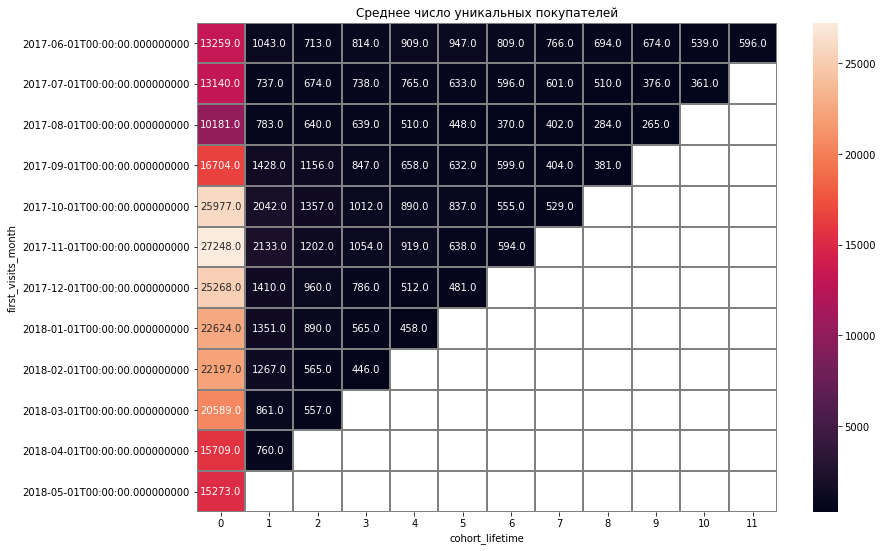

In [30]:
visits_grouped_by_cohorts = visits_grouped_by_cohorts.reset_index()
visits_grouped_by_cohorts['cohort_lifetime'] = (
    ((visits_grouped_by_cohorts['visits_month'] - visits_grouped_by_cohorts['first_visits_month'])/np.timedelta64(1,'M'))
    .round().astype('int')
)
#сводная таблица изменения количества уникальных посетителей, где в столбцах будет lifetime, а строках — когорты
cohorts= visits_grouped_by_cohorts.pivot_table(index='first_visits_month',columns='cohort_lifetime',values='uid',aggfunc='mean')
# Однако тяжело воспринимать все эти числа, поэтому для визуализации используем также тепловую карту методом heatmap(). 
plt.figure(figsize=(13, 9))
plt.title('Среднее число уникальных покупателей')
sns.heatmap(cohorts, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Видно, что число посетителей уменьшается с каждым месяцем почти во всех когортах, а в некоторых падение даже стремительное. Однако первый столбец сильно портит нашу статистику, поэтому лучше расчитать коэффициент удержания за счет отношения числа пользователей к общему числу, а после этого убрать из тепловой карты первый столбец. 

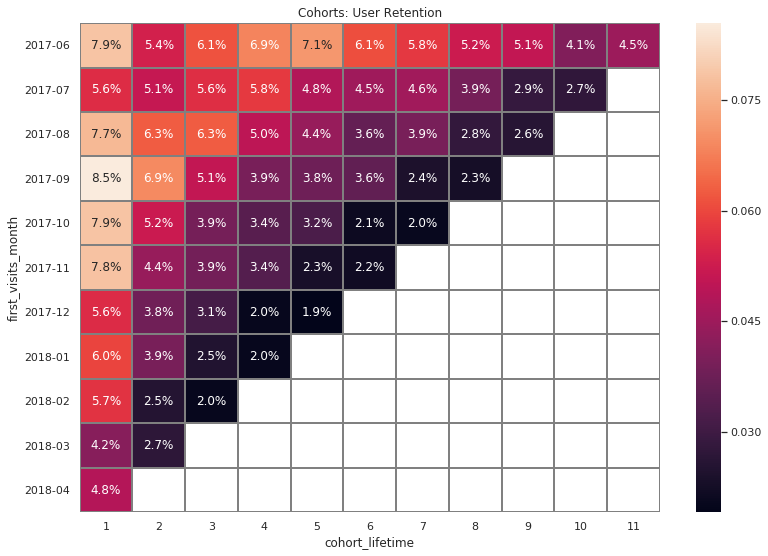

In [31]:
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевом месяце
initial_users_count=visits_grouped_by_cohorts[visits_grouped_by_cohorts['cohort_lifetime']==0][['first_visits_month', 'uid']]
initial_users_count=initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts=visits_grouped_by_cohorts.merge(initial_users_count, on='first_visits_month')
cohorts['retention']=cohorts['uid']/cohorts['cohort_users']
#Применим метод dt.strftime(), чтобы превратить объект Series с типом datetime в строку в формате даты
cohorts['first_visits_month']=cohorts['first_visits_month'].dt.strftime('%Y-%m')
#исключаем первый столбц,чтобы лучше различать цветовую гамму,
#тем более данный столбец не несет никакой полезной информации, так как от этого столбца мы отсчитаем всё
retention_pivot=cohorts[cohorts['cohort_lifetime'] !=0].pivot_table(index='first_visits_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

В целом мы видим,что коэффициент удержания падает равномерно по всем когортам. Возможно, были выбраны неэффективные источники привлечения рекламы или ухудшилось качество работы мобильного приложения. Поэтому исследуем этот парметр отдельного для каждого источника и устройства. Причём будем анализировать только те когорты, где уже существуют достаточно долго(6 мсяцев и более), поэтому молодые когорты исключим из анализа, чтобы минимизировать погрешности и статистику результата.

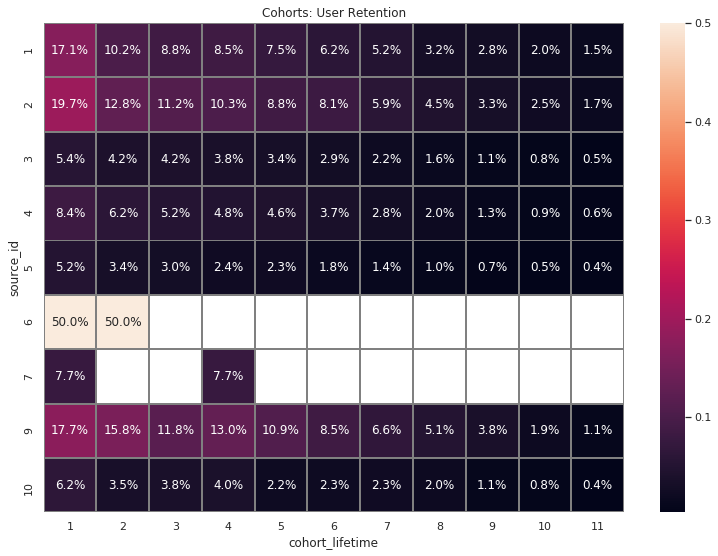

In [32]:
#сделаем аналогичные рассчеты с RR, только теперь когорты будут-источники 
cohorts_for_source=visits_cogort[visits_cogort['first_visits_month']<'2017-12'].groupby(['source_id','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
users_count_for_source=cohorts_for_source[cohorts_for_source['cohort_lifetime']==0][['source_id', 'uid']]
users_count_for_source=users_count_for_source.rename(columns={'uid':'cohort_users'})
cohorts_for_source=cohorts_for_source.merge(users_count_for_source, on='source_id')
cohorts_for_source['retention']=cohorts_for_source['uid']/cohorts_for_source['cohort_users']
retention_pivot=cohorts_for_source[cohorts_for_source['cohort_lifetime'] !=0].pivot_table(index='source_id',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

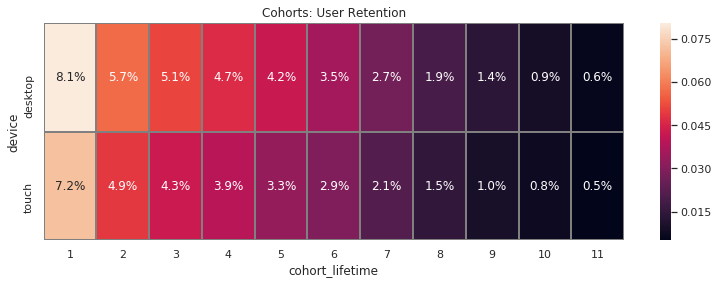

In [33]:
#сделаем аналогичные рассчеты с RR, только теперь когорты будут-устройства
cohorts_for_device=visits_cogort[visits_cogort['first_visits_month']<'2017-12'].groupby(['device','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
users_count_for_device=cohorts_for_device[cohorts_for_device['cohort_lifetime']==0][['device', 'uid']]
users_count_for_device=users_count_for_device.rename(columns={'uid':'cohort_users'})
cohorts_for_device=cohorts_for_device.merge(users_count_for_device, on='device')
cohorts_for_device['retention']=cohorts_for_device['uid']/cohorts_for_device['cohort_users']
retention_pivot=cohorts_for_device[cohorts_for_device['cohort_lifetime'] !=0].pivot_table(index='device',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 4))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### Вывод по продукту

Из полученных нами рассчетов можно сказать, что у данного приложения приличное число активных пользователей за месяц (23228). Регулярно используют данное приложение в течении недели 16% пользователей, что говорит о достаточной востребованости его на рынке. Пик посещаемости приходится на ноябрь, что согласуется с большим числом недорогих билетов на год вперед и предновогодних скидок, также достаточно высокое посещение наблюдается вначале апреля. 

Намного больше людей заходят в Яндексу.Афиша по компьютеру, мобильная версия в пике посещаемости уступает почти в 3,5 раза, Rotation Rate для 'touch' ниже на 1% в течении полугода. Длительностью сеанса также наводит на мысли,что есть некая проблема в мобильном приложении,так как медианное значение длительности сессии 'touch' ниже 'dekstop' в 2 раза (180 против 360 секунд). Следовательно разработчикам mobile version стоит обратить внимание на данные цифры, возможно есть некие ошибки в программе или создан неудобный интерфейс для пользователя. 

Если говорить об источниках, то лидерами приносящими высокую посещаемость являются 3, 4 и 5, в то время как 10 и 9 почти никакой вклад не дают, а 7 и 6 принесли пользователей всего в двух месяцах, поэтому вкладываться в их развитие не стоит, эти источники пользуются слабы спросом. По длительности сенса люди больше всего проводят времени из источника 1, 2, 9 и 10, а источники 3, 4 и 5 уступают им, хотя и имеют длительность в медианном значении около 4х минут. Rotation Rate довольно высокий в первый месяц жизни для 1 (17,1%) , 2(19,7%), 4(8,4%) и 9(17,7%) источника, остальные имеют более равномерный спад и значения. Исходя из этого можно сделать вывод, что маркетолагом обратить внимание на развитие источников 1 и 2, они могут стать потенциально прибыльными источниками, а также выяснить,что повлияло на такой спад в 4 источнике.


### Продажи

##### "Когда люди начинают покупать?"
Чтобы ответить на данный вопрос нужно рассчитать время от начала сессии до момента покупки.

In [34]:
#Сгруппируем данные по столбцу 'uid' методом groupby(). Для каждого клиента получим дату первого заказа— ['start_ts'].min()
first_visits_session = visits.groupby('uid')['start_ts'].min()
#изменим имя на first_visits_session, обратившись к name Series.
first_visits_session.name = 'first_visits_session'
#Сгруппируем данные по столбцу 'uid' методом groupby(). Для каждого клиента получим дату первого покупки— ['buy_ts'].min()
first_buy_session = orders.groupby('uid')['buy_ts'].min()
#изменим имя на first_buy_session, обратившись к name Series.
first_buy_session.name = 'first_buy_session'
#Теперь объеденим таблицу orders с столбцов 'first_buy_session' таблицы buy_session по идентификатору пользователя 'uid'.
orders_first_buy=orders.join(first_buy_session, on='uid')
where_buy=orders_first_buy.join(first_visits_session, on='uid')
where_buy

,buy_ts,revenue,uid,first_buy_session,first_visits_session
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00


In [35]:
#и наконец найдём время необходимое на покупку в минутах
where_buy['time_purchase']=(where_buy['first_buy_session'] - where_buy['first_visits_session'])/np.timedelta64(1,'m')
#найдём долю быстрых покупок.Для этого делим количество покупок длительностью короче 60 секунд на общее число покупок
print('доля быстрых покупок ', len(where_buy.query('time_purchase < 2')) / len(where_buy))
print('Мода продолжительность времени покупки ', where_buy['time_purchase'].mode()[0])

доля быстрых покупок  0.1423782604383616
Мода продолжительность времени покупки  0.0


Видно, что быстрых покупок почти 15%. При этом мода равно 0 секунд, что выглядит очень подозрительно, так как в любом случае пара секунд нужна на оформление покупки, возможно где-то произошла шибка при обработке данных. 

Посмотрим на распределение и найдём медиану покупки.

Медиана продолжительности времени покупки  22.0


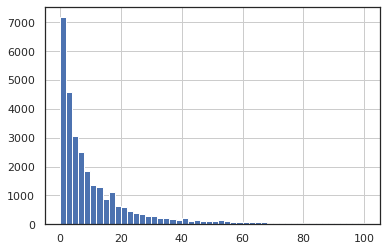

In [36]:
print('Медиана продолжительности времени покупки ', where_buy['time_purchase'].median())
where_buy['time_purchase'].hist(bins=50, range=(0,100))

Таким образом видно, что чаще всего люди делают заказы сразу же как переходят на сайт (в течении 60 секунд), хотя медианное значение говорит о том что покупка совершается в течении 22 минут.

Проверим теперь, как это время распредлено между источниками и устройствами. Ввиду того что группировать нужно только по 'uid', то отсортируем данные и вынесем только первые даты посещений пользователей, из какого источника пришли люди и с какого устройства они заходили, сохраним всё в users. Затем объединим с данными таблицы order и построим гистограммы распределений. 

Мода продолжительность времени покупки desktop = 0.0
Медиана продолжительности времени покупки = desktop = 20.0
Мода продолжительность времени покупки touch = 0.0
Медиана продолжительности времени покупки = touch = 57.0


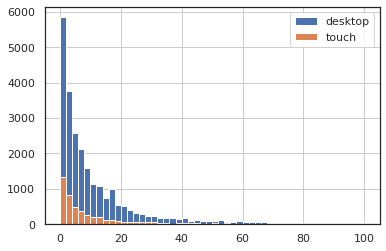

In [37]:
users = (visits.sort_values(by = ['uid', 'start_ts'])
               .groupby('uid')
               .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})
               .rename(columns={'start_ts':'acquisition_ts'}))
buy=orders_first_buy.join(users, on='uid')
#и наконец найдём время необходимое на покупку в минутах
buy['time_purchase']=(buy['first_buy_session'] - buy['acquisition_ts'])/np.timedelta64(1,'m')
for device in buy['device'].unique():
    buy_device = buy[buy['device'] == device]['time_purchase']
    buy_device.hist(bins=50, range=(0,100), label=device) 
    plt.legend()
    print('Мода продолжительность времени покупки', device, '=', buy_device.mode()[0])
    print('Медиана продолжительности времени покупки =', device, '=', buy_device.median())

Мода продолжительность времени покупки источника 1 = 0.0
Медиана продолжительности времени покупки источника 1 = 17.0
Мода продолжительность времени покупки источника 2 = 0.0
Медиана продолжительности времени покупки источника 2 = 141.0
Мода продолжительность времени покупки источника 3 = 1.0
Медиана продолжительности времени покупки источника 3 = 24.0
Мода продолжительность времени покупки источника 5 = 0.0
Медиана продолжительности времени покупки источника 5 = 14.0
Мода продолжительность времени покупки источника 4 = 1.0
Медиана продолжительности времени покупки источника 4 = 21.0
Мода продолжительность времени покупки источника 9 = 0.0
Медиана продолжительности времени покупки источника 9 = 5038.0
Мода продолжительность времени покупки источника 10 = 1.0
Медиана продолжительности времени покупки источника 10 = 13.0
Мода продолжительность времени покупки источника 7 = 52.0
Медиана продолжительности времени покупки источника 7 = 52.0


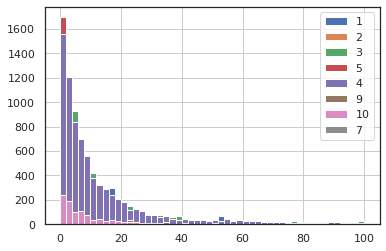

In [38]:
for source in buy['source_id'].unique():
    buy_source = buy[buy['source_id'] == source]['time_purchase']
    buy_source.hist(bins=50, range=(0,100), label=source) 
    plt.legend()
    print('Мода продолжительность времени покупки источника', source, '=', buy_source.mode()[0])
    print('Медиана продолжительности времени покупки источника', source, '=', buy_source.median())

Мода продолжительность времени покупки источника 1 = 0.0
Медиана продолжительности времени покупки источника 1 = 17.0
Мода продолжительность времени покупки источника 2 = 0.0
Медиана продолжительности времени покупки источника 2 = 141.0
Мода продолжительность времени покупки источника 3 = 1.0
Медиана продолжительности времени покупки источника 3 = 24.0
Мода продолжительность времени покупки источника 5 = 0.0
Медиана продолжительности времени покупки источника 5 = 14.0
Мода продолжительность времени покупки источника 4 = 1.0
Медиана продолжительности времени покупки источника 4 = 21.0
Мода продолжительность времени покупки источника 9 = 0.0
Медиана продолжительности времени покупки источника 9 = 5038.0
Мода продолжительность времени покупки источника 10 = 1.0
Медиана продолжительности времени покупки источника 10 = 13.0
Мода продолжительность времени покупки источника 7 = 52.0
Медиана продолжительности времени покупки источника 7 = 52.0


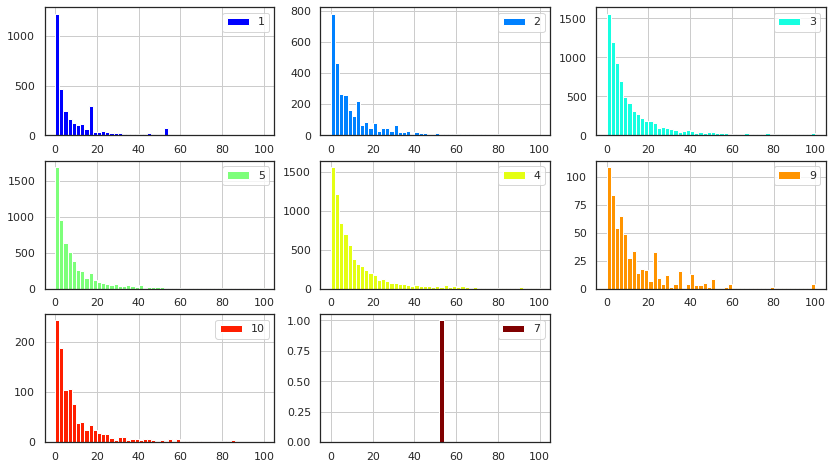

In [39]:
i=1
from matplotlib import cm
fig = plt.figure(figsize=(14,8))
for source in buy['source_id'].unique():
    buy_source = buy[buy['source_id'] == source]['time_purchase']
    ax=plt.subplot(3,3,i)
    buy_source.hist(bins=50, range=(0,100), label=source, ax=ax, color=cm.jet(1.*i/len(buy['source_id'].unique()))) 
    plt.legend()    
    print('Мода продолжительность времени покупки источника', source, '=', buy_source.mode()[0])
    print('Медиана продолжительности времени покупки источника', source, '=', buy_source.median())
    i+=1

##### "Сколько раз покупают за период?"
Следующий параметр который для нас важен - количество покупок за период. Посчитаем количество покупок в каждом месяце .Данные почти за год, поэтому удобнее всего сформировать месячные когорты. 

In [40]:
#Выделим месяцы из дат в таблицах с заказами и расходами
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')
#Получим месяц первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Чтобы отследить данный показатель среди источников и устройств нам нужно прежде всего воспользоваться таблицей пользователей c покупками -buy. А так когорты будем месяцы приобретения, то выделим методом .astype('datetime64[M]') 'acquisition_month' из 'acquisition_ts', а также дату первого приобретения прихода методом .dt.date

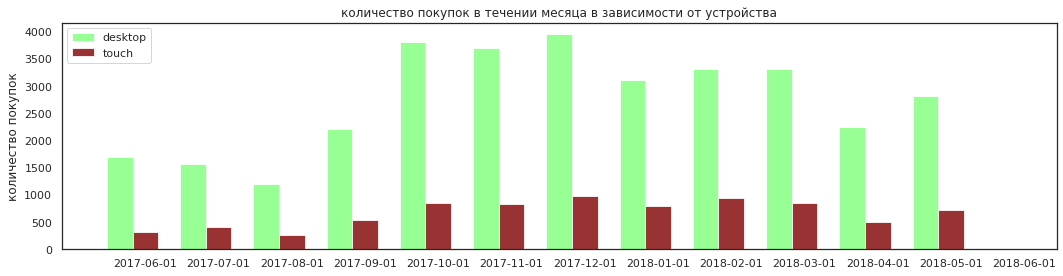

In [41]:
buy['acquisition_date']=buy['acquisition_ts'].dt.date
#.astype('datetime64[M]') определяет начало месяца,в котором пользователь впервые пришел на сайт
buy['acquisition_month']=buy['acquisition_ts'].astype('datetime64[M]')
#методм dt.date определяем день и месяц приобретения товара в таблице orders
buy['purchase_date']=buy['buy_ts'].dt.date
buy['purchase_month']=buy['buy_ts'].astype('datetime64[M]')
#выделим только необходимые для анализа столбцы
users_buy=buy[['uid','acquisition_ts', 'acquisition_date','acquisition_month','source_id', 'device', 'buy_ts', 'revenue', 'purchase_month']]
#строим сводную таблицу по устройствам и рассчитываем количество покупок 
buy_device=users_buy.pivot_table(values='uid', index='device', columns='purchase_month', aggfunc= 'nunique')
#задаём область графическую
fig, ax = plt.subplots(figsize=(15, 4)) 
#сдфиг от первого столбца для столбчатого графика
bar_width=0
#счётчик для света
i=1
#будем строить графики на одной области, для этого создаём цикл по устройствам, типы устройст опредяем методом .unique()
for device in users_buy['device'].unique() :
    x=buy_device.columns
    #у- число уникальных пользователей в день для определенного типа устройства
    y=buy_device[buy_device.index == device].values[0]
    index = np.arange(len(buy_device.columns))
    ax.bar(index + bar_width, y, width=0.35, alpha=0.8, color=cm.jet(1.*i/len(users_buy['device'].unique())), label=device)  
    bar_width=0.35
    i +=1
ax.set_title('количество покупок в течении месяца в зависимости от устройства')
ax.legend(loc='upper left')
ax.set_ylabel('количество покупок')
plt.xticks(index + bar_width, buy_device.columns.date) 
plt.tight_layout()
plt.show()

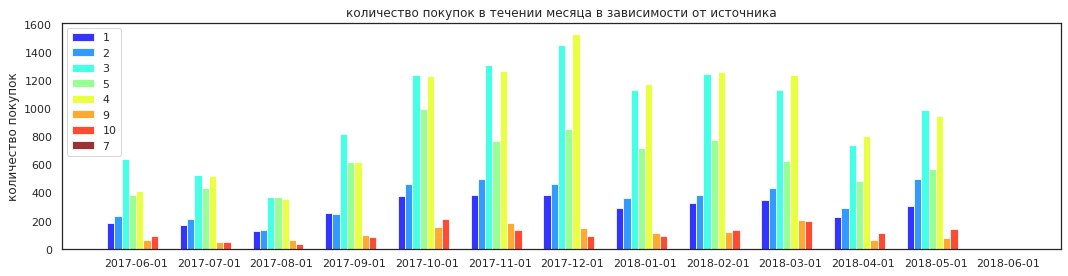

In [42]:
#строим сводную таблицу по устройствам и рассчитываем количество покупок 
buy_source=users_buy.pivot_table(values='uid', index='source_id', columns='purchase_month', aggfunc= 'nunique')
#задаём область графическую
fig, ax = plt.subplots(figsize=(15, 4)) 
#сдфиг от первого столбца для столбчатого графика
bar_width=0
#счётчик для света
i=1
#будем строить графики на одной области, для этого создаём цикл по устройствам, типы устройст опредяем методом .unique()
for source in users_buy['source_id'].unique() :
    x=buy_source.columns
    #у- число уникальных пользователей в день для определенного типа устройства
    y=buy_source[buy_source.index == source].values[0]
    index = np.arange(len(buy_source.columns))
    ax.bar(index + bar_width, y, width=0.1, alpha=0.8, color=cm.jet(1.*i/len(users_buy['source_id'].unique())), label=source)  
    bar_width += 0.1
    i +=1
ax.set_title('количество покупок в течении месяца в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('количество покупок')
plt.xticks(index + + 0.35, buy_device.columns.date) 
plt.tight_layout()
plt.show()

##### "Какой средний чек?"

Cредний чек- сумма денег деленная на уникальных покупателей за определенный период времени. 

In [43]:
#Добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
#Группируем таблицу заказов по месяцу покупки, а затем складываем выручку и высчитываем количество уникальных посетителей
#в каждом месяце 
cohorts = orders_new.groupby(['order_month']).agg({'revenue': 'sum', 'uid' : 'nunique'})
cohorts['av_check']=cohorts['revenue']/cohorts['uid']
cohorts

,revenue,uid,av_check
order_month,,,
2017-06-01,9557.49,2023,4.724414
2017-07-01,12539.47,1984,6.320297
2017-08-01,8758.78,1472,5.950258
2017-09-01,18345.51,2750,6.671095
2017-10-01,27987.70,4675,5.986674
2017-11-01,27069.93,4547,5.953360
2017-12-01,36388.60,4942,7.363132
2018-01-01,19417.13,3898,4.981306
2018-02-01,25560.54,4258,6.002945


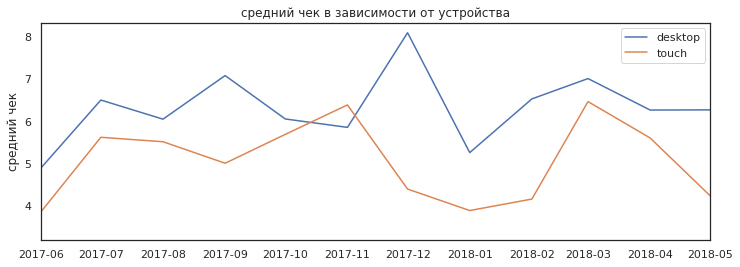

In [44]:
fig, ax = plt.subplots(figsize=(12, 4)) 
for devices in users_buy['device'].unique():
    devise=users_buy[users_buy['device'] == devices]
    devise_check = devise.groupby(['purchase_month']).agg({'revenue': 'sum', 'uid':'nunique'})
    devise_check.columns = ['revenue', 'n_buyers']
    devise_check['av_check']=devise_check['revenue']/devise_check['n_buyers']
    x=devise_check.index
    y=devise_check['av_check']
    ax.plot(x, y, label=devices)  
ax.set_title('средний чек в зависимости от устройства')
ax.legend(loc='upper right')
ax.set_ylabel('средний чек')
ax.set_xlim(xmin=devise_check.index[0], xmax=devise_check.index[-1])    
plt.show()

Text(0, 0.5, 'средний чек')

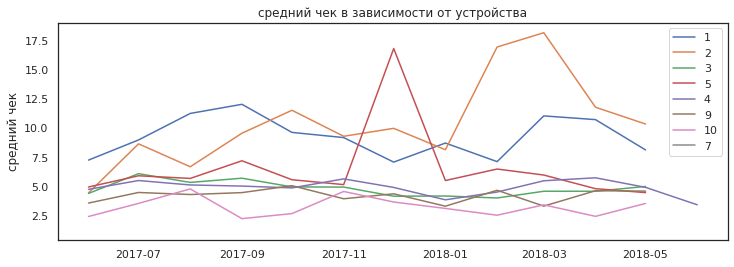

In [45]:
fig, ax = plt.subplots(figsize=(12, 4)) 
for sources in users_buy['source_id'].unique():
    source=users_buy[users_buy['source_id'] == sources]
    source_check = source.groupby(['purchase_month']).agg({'revenue': 'sum', 'uid':'nunique'})
    source_check.columns = ['revenue', 'n_buyers']
    source_check['av_check']=source_check['revenue']/source_check['n_buyers']
    x=source_check.index
    y=source_check['av_check']
    ax.plot(x, y, label= sources)  
ax.set_title('средний чек в зависимости от устройства')
ax.legend(loc='upper right')
ax.set_ylabel('средний чек')
#ax.set_xlim(xmin=source_check.index[0], xmax=source_check.index[-1]) 

#### Вывод по продажам

Чаще всего люди делают заказы сразу же как переходят на сайт (в течении 60 секунд), хотя медианное значение говорит о том что покупка совершается в течении 22 минут, около 15% процентов данных говорят,что покупка совершается втечении 2 минут. Больше всего покупок совершается в период с октябрь по декабрь, затем идёт постепенный спад к лету и начиная с августа продажи снова растут. Самый высокий средний чек наблюдается в декабре месяце, также достаточно высокий чек в весение месяцы 2018 года, а меньше всего в начале лета и январе.

Больше всего покупок совершается с компьютера с средней продолжительностью 20 минут, а вот с телефона продолжительность покупок составляет 57 минут, что говорит о возможных проблемах в приложении, багах или же неудобном меню-заказа. Наибольший средний чек по устройствам наблюдается в ноябре (телефон) и декабре (компьютер), также хорошая выручка в марте 2018 года.

Если же говорить об источниках, то всреднем быстрее покупки совершаются из источников 1(17 минут), 5(14 минут) и 10(13 минут), медленее всего из 2(141 минута) и 9(5038 минут). Однако по количеству покупок и среднему чеку ситцауция совсем другая, так больше всего покупают из 3,5 и 4 источников, а меньше всего с 9 и 10, а самый высокий чек пришел из 2 и 5 источников, также достаточно высокий чек из 1 источника. 

7 и 6 источники стоит исключить из исследования, так как с 7 источника всего одна запись в продажах, а 6 вообще не участвовал в них.

### Маркетинг


##### Рассчет расходов:  всего / на каждый источник / по времени

In [46]:
#найдем суммарные расходы по столбцу 'costs' методом sum()
print('Суммарные затраты на рекламу: ', costs['costs'].sum())
#расходы по каждому источнику 
costs_source=costs.groupby('source_id').agg({'costs': 'sum'})
print('Расходы по каждому источнику: ', costs_source, sep='\n')

Суммарные затраты на рекламу:  329131.62
Расходы по каждому источнику: 
               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


In [47]:
#найдем сумму расходов в зависимости от месяца недели, дня. Для этого прменим к дате dt.year/dt.month/dt.week
costs['costs_year']  = costs['dt'].dt.year
costs['costs_month'] = costs['dt'].dt.month
costs['costs_week']  = costs['dt'].dt.week

In [48]:
dau_costs = costs.groupby('dt').agg({'costs': 'sum'}).mean()
print('количество расходов в день: ',int(dau_total))
wau_costs = costs.groupby(['costs_year', 'costs_week']).agg({'costs': 'sum'}).mean()
print('количество расходов в неделю: ',int(wau_total))
mau_costs=costs.groupby(['costs_year', 'costs_month']).agg({'costs': 'sum'}).mean()
print('количество расходов в месяц: ',int(mau_total))

количество расходов в день:  907
количество расходов в неделю:  5716
количество расходов в месяц:  23228


(1, 22)

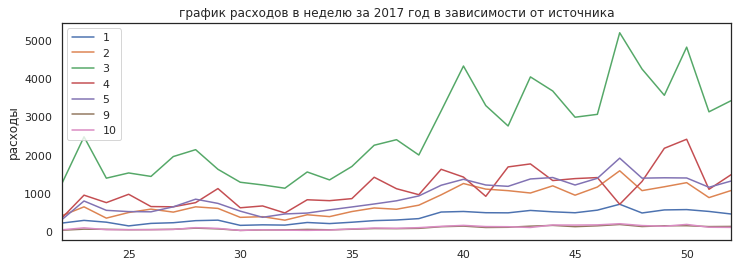

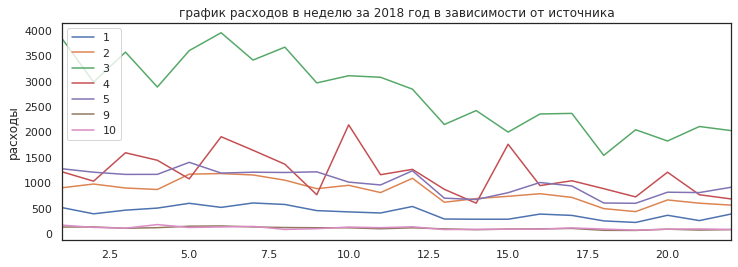

In [49]:
# найдем распредление расходов в зависимости от недели аналогично как это делали с поисками wau
wau_source=costs[costs['costs_year']==2017].pivot_table(values='costs', index='source_id', columns=['costs_week'], aggfunc= 'sum')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in costs['source_id'].unique() :
    x=wau_source.columns
    y=wau_source[wau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('график расходов в неделю за 2017 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('расходы')
ax.set_xlim(xmin=wau_source.columns[0], xmax=wau_source.columns[-1])
wau_source=costs[costs['costs_year']==2018].pivot_table(values='costs', index='source_id', columns=['costs_week'], aggfunc= 'sum')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in costs['source_id'].unique() :
    x=wau_source.columns
    y=wau_source[wau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('график расходов в неделю за 2018 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('расходы')
ax.set_xlim(xmin=wau_source.columns[0], xmax=wau_source.columns[-1])

(1, 5)

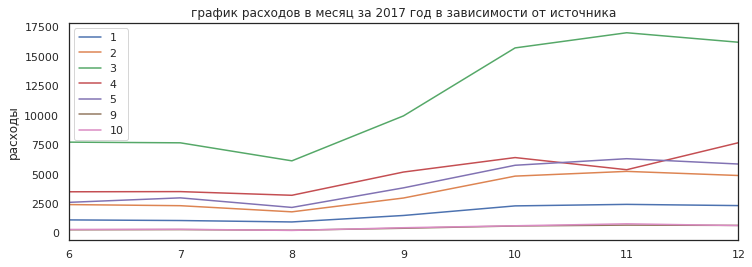

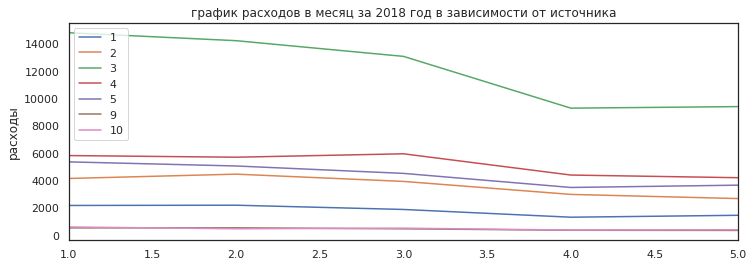

In [50]:
# также найдем распредление расходов в зависимости от месяца года 
mau_source=costs[costs['costs_year']==2017].pivot_table(values='costs', index='source_id', columns=['costs_month'], aggfunc= 'sum')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in costs['source_id'].unique() :
    x=mau_source.columns
    y=mau_source[mau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('график расходов в месяц за 2017 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('расходы')
ax.set_xlim(xmin=mau_source.columns[0], xmax=mau_source.columns[-1])
mau_source=costs[costs['costs_year']==2018].pivot_table(values='costs', index='source_id', columns=['costs_month'], aggfunc= 'sum')
fig, ax = plt.subplots(figsize=(12, 4)) 
for source in costs['source_id'].unique() :
    x=mau_source.columns
    y=mau_source[mau_source.index == source].values[0]
    ax.plot(x, y, label=source)  
ax.set_title('график расходов в месяц за 2018 год в зависимости от источника')
ax.legend(loc='upper left')
ax.set_ylabel('расходы')
ax.set_xlim(xmin=mau_source.columns[0], xmax=mau_source.columns[-1]) 


##### Стоимость привлечения одного покупателя из каждого источника (CAC)

Для того чтобы посчитать CAC,необходимо поделить расходы за месяц на количество людей в когорте. 

Начнем рассчеты с объединения costs и users по столбцам 'source_id' и 'acquisition_date', так как дни расходов на рекламу должны совпадать с днями когда пользователей воспользовался рекламой об этом сайте и перешел на него на. 

In [51]:
#выделяем день 'acquisition_date' и месяц 'acquisition_month' захода на сайт  
users['acquisition_month']=users['acquisition_ts'].astype('datetime64[M]')
users['acquisition_date']=users['acquisition_ts'].dt.date
#выделяем день 'acquisition_date' перехода на сайт по источнику 
costs['acquisition_date']=costs['dt'].dt.date

In [52]:
users= (users.reset_index()
            .set_index(['source_id', 'acquisition_date'])
            .join(costs.set_index(['source_id', 'acquisition_date']), how='left')
           )
users

uid      acquisition_ts   device  \
source_id acquisition_date                                                      
1         2017-06-01          469568501030474895 2017-06-01 05:30:00  desktop   
          2017-06-01          618675438905551322 2017-06-01 02:37:00    touch   
          2017-06-01         1074355127080856382 2017-06-01 09:21:00  desktop   
          2017-06-01         1292867924428534308 2017-06-01 12:53:00  desktop   
          2017-06-01         1548840741623289234 2017-06-01 01:18:00  desktop   
...                                          ...                 ...      ...   
10        2018-05-31        17550479715346067160 2018-05-31 22:00:00    touch   
          2018-05-31        17715613363403416471 2018-05-31 03:30:00  desktop   
          2018-05-31        18076428844159112818 2018-05-31 17:47:00    touch   
          2018-05-31        18238279803055794091 2018-05-31 15:52:00    touch   
          2018-05-31        18428797902626915731 2018-05-31 22:10:00  desktop   

                           acquisition_month         dt  costs      month  \
source_id acquisition_date                                                  
1         2017-06-01              2017-06-01 2017-06-01   75.2 2017-06-01   
          2017-06-01              2017-06-01 2017-06-01   75.2 2017-06-01   
          2017-06-01              2017-06-01 2017-06-01   75.2 2017-06-01   
          2017-06-01              2017-06-01 2017-06-01   75.2 2017-06-01   
          2017-06-01              2017-06-01 2017-06-01   75.2 2017-06-01   
...                                      ...        ...    ...        ...   
10        2018-05-31              2018-05-01 2018-05-31   17.6 2018-05-01   
          2018-05-31              2018-05-01 2018-05-31   17.6 2018-05-01   
          2018-05-31              2018-05-01 2018-05-31   17.6 2018-05-01   
          2018-05-31              2018-05-01 2018-05-31   17.6 2018-05-01   
          2018-05-31              2018-05-01 2018-05-31   17.6 2018-05-01   

                            costs_year  costs_month  costs_week  
source_id acquisition_date                                       
1         2017-06-01            2017.0          6.0        22.0  
          2017-06-01            2017.0          6.0        22.0  
          2017-06-01            2017.0          6.0        22.0  
          2017-06-01            2017.0          6.0        22.0  
          2017-06-01            2017.0          6.0        22.0  
...                                ...          ...         ...  
10        2018-05-31            2018.0          5.0        22.0  
          2018-05-31            2018.0          5.0        22.0  
          2018-05-31            2018.0          5.0        22.0  
          2018-05-31            2018.0          5.0        22.0  
          2018-05-31            2018.0          5.0        22.0  

[228169 rows x 10 columns]

Посчитаем стоимость на приобретение одного пользователя. Дело в том что мы имеем суммарную стоимость по какому-то источнику в течении дня. Значит нам надо рассчитать сколько человек пришло из каждого источника в течении дня, а затем поделить суммарную стоимость на количество пользователей.

In [53]:
per_users_cost = (users.groupby(['source_id', 'acquisition_date'])
                  .agg({'uid': 'count','costs': 'max'})
                  .rename(columns={'uid' : 'user'})
                 )
per_users_cost['per_users_cost']=per_users_cost['costs']/per_users_cost['user']
per_users_cost

user  costs  per_users_cost
source_id acquisition_date                             
1         2017-06-01          47  75.20        1.600000
          2017-06-02          27  62.25        2.305556
          2017-06-03          22  36.53        1.660455
          2017-06-04          23  55.00        2.391304
          2017-06-05          39  57.08        1.463590
...                          ...    ...             ...
10        2018-05-27           5   9.92        1.984000
          2018-05-28          34  21.26        0.625294
          2018-05-29          23  11.32        0.492174
          2018-05-30          54  33.15        0.613889
          2018-05-31          99  17.60        0.177778

[2568 rows x 3 columns]

In [54]:
#добавляем расходы на пользователя в таблицу users_cost
users=users.join(per_users_cost[['per_users_cost']], how='left').reset_index()
users= users.set_index('uid')[['source_id','acquisition_date','acquisition_ts','device', 'acquisition_month', 'per_users_cost']]    
users

,source_id,acquisition_date,acquisition_ts,device,acquisition_month,per_users_cost
uid,,,,,,
469568501030474895,1,2017-06-01,2017-06-01 05:30:00,desktop,2017-06-01,1.600000
618675438905551322,1,2017-06-01,2017-06-01 02:37:00,touch,2017-06-01,1.600000
1074355127080856382,1,2017-06-01,2017-06-01 09:21:00,desktop,2017-06-01,1.600000
1292867924428534308,1,2017-06-01,2017-06-01 12:53:00,desktop,2017-06-01,1.600000
1548840741623289234,1,2017-06-01,2017-06-01 01:18:00,desktop,2017-06-01,1.600000
...,...,...,...,...,...,...
17550479715346067160,10,2018-05-31,2018-05-31 22:00:00,touch,2018-05-01,0.177778
17715613363403416471,10,2018-05-31,2018-05-31 03:30:00,desktop,2018-05-01,0.177778
18076428844159112818,10,2018-05-31,2018-05-31 17:47:00,touch,2018-05-01,0.177778


В анализе метрик: сас , ltv и roi - будем учитывать лишь плательщиков. Чтобы найти таких пользователей, надо просто вычислить время первой покупки для каждого пользователя из таблицы продаж, и проверить наличие их в users_cost.

In [55]:
users=users.join(orders.groupby('uid').agg({'buy_ts':min}).rename(columns=({'buy_ts':'first_order_ts'})), how='left')
users['payer']= ~ users['first_order_ts'].isna()
users = users[~((users['source_id'] == 6) | (users['source_id'] == 7))]
users

,source_id,acquisition_date,acquisition_ts,device,acquisition_month,per_users_cost,first_order_ts,payer
uid,,,,,,,,
469568501030474895,1,2017-06-01,2017-06-01 05:30:00,desktop,2017-06-01,1.600000,2017-09-11 00:06:00,True
618675438905551322,1,2017-06-01,2017-06-01 02:37:00,touch,2017-06-01,1.600000,NaT,False
1074355127080856382,1,2017-06-01,2017-06-01 09:21:00,desktop,2017-06-01,1.600000,2017-06-01 09:23:00,True
1292867924428534308,1,2017-06-01,2017-06-01 12:53:00,desktop,2017-06-01,1.600000,2017-06-01 16:47:00,True
1548840741623289234,1,2017-06-01,2017-06-01 01:18:00,desktop,2017-06-01,1.600000,NaT,False
...,...,...,...,...,...,...,...,...
17550479715346067160,10,2018-05-31,2018-05-31 22:00:00,touch,2018-05-01,0.177778,NaT,False
17715613363403416471,10,2018-05-31,2018-05-31 03:30:00,desktop,2018-05-01,0.177778,NaT,False
18076428844159112818,10,2018-05-31,2018-05-31 17:47:00,touch,2018-05-01,0.177778,NaT,False


In [56]:
#когорты
cohorts = (users[~((users['source_id'] == 6) | (users['source_id'] == 7))].groupby('acquisition_month')
           .agg({'payer' : 'sum', 'per_users_cost': 'sum'})
           .rename(columns = {'payer' : 'size', 'per_users_cost': 'sum_costs'})    
)
cohorts['cac']=cohorts['sum_costs']/cohorts['size']
cohorts

,size,sum_costs,cac
acquisition_month,,,
2017-06-01,2923.0,18015.00,6.163189
2017-07-01,2458.0,18230.81,7.416928
2017-08-01,1720.0,14789.17,8.598355
2017-09-01,3058.0,24360.36,7.966109
2017-10-01,4678.0,36322.88,7.764617
2017-11-01,4262.0,37907.88,8.894388
2017-12-01,4074.0,38306.03,9.402560
2018-01-01,3119.0,33518.52,10.746560
2018-02-01,3186.0,32707.71,10.266073


In [57]:
cohorts_source = (users[users['acquisition_month']<'2017-12-01'].groupby('source_id')
           .agg({'payer' : 'sum', 'per_users_cost': 'sum'})
           .rename(columns = {'payer' : 'size', 'per_users_cost': 'sum_costs'})    
)
cohorts_source['cac']=cohorts_source['sum_costs']/cohorts_source['size']
cohorts_source

,size,sum_costs,cac
source_id,,,
1,1479.0,9413.22,6.364584
2,1894.0,19649.88,10.374805
3,5478.0,64275.69,11.733423
4,4998.0,27263.81,5.454944
5,3827.0,23741.42,6.203663
9,750.0,2526.57,3.368760
10,673.0,2755.51,4.094368


In [58]:
cohorts_device = (users[users['acquisition_month']<'2017-12-01'].groupby('device')
           .agg({'payer' : 'sum', 'per_users_cost': 'sum'})
           .rename(columns = {'payer' : 'size', 'per_users_cost': 'sum_costs'})    
)
cohorts_device['cac']=cohorts_device['sum_costs']/cohorts_device['size']
cohorts_device

,size,sum_costs,cac
device,,,
desktop,15364.0,108337.24231,7.05137
touch,3735.0,41288.85769,11.05458


##### LTV

In [59]:
users_buy = users_buy[~((users_buy['source_id'] == 6) | (users_buy['source_id'] == 7))]

In [60]:
ltv=users_buy.set_index('uid')[['acquisition_month', 'purchase_month', 'revenue']]
margin_rate = 1 
ltv['gp'] = ltv['revenue'] * margin_rate
ltv['age'] = ((ltv['purchase_month'] - ltv['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv=ltv.groupby(['acquisition_month', 'age']).agg({'revenue': 'sum'})
ltv=pd.pivot_table(ltv, index='acquisition_month', columns='age', values='revenue' , aggfunc='sum')
ltv=ltv.cumsum(axis=1)
ltv=cohorts[['size']].join(ltv)
ltv=ltv.div(ltv['size'], axis = 0).drop(columns=['size'])
ltv

,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,3.269754,4.181345,4.682436,6.010554,7.358686,8.324981,9.518943,10.295819,11.088809,12.279928,13.033951,13.693483
2017-07-01,4.017449,4.448401,4.899540,5.299443,5.644028,5.968714,6.207933,6.521318,6.816078,7.056530,7.246587,NaN
2017-08-01,3.624180,4.204017,4.786198,5.336320,5.807273,6.117099,6.400035,7.124587,7.607517,7.825959,NaN,NaN
2017-09-01,4.040942,5.251040,5.941239,9.354886,9.776233,10.400840,10.717008,10.877695,11.014572,NaN,NaN,NaN
2017-10-01,3.925250,4.739664,5.023337,5.249513,5.472572,5.691082,5.814833,5.955043,NaN,NaN,NaN,NaN
2017-11-01,3.878881,4.504779,4.819855,5.141190,5.401335,5.567367,5.731281,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.137703,4.564563,5.595074,6.852761,7.210535,7.647975,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.397567,4.023312,4.396752,4.494822,4.663937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.613506,4.236375,4.444532,4.727335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#сделаем аналогичные рассчеты ltv, только теперь когорты будут-источники 
ltv_source=users_buy[users_buy['acquisition_month']<'2017-12-01'].set_index('uid')[['acquisition_month', 'purchase_month', 'revenue', 'source_id']]
margin_rate = 1 
ltv_source['gp'] = ltv_source['revenue'] * margin_rate
ltv_source['age'] = ((ltv_source['purchase_month'] - ltv_source['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv_source=ltv_source.groupby(['source_id', 'age']).agg({'revenue': 'sum'})
ltv_source=pd.pivot_table(ltv_source, index='source_id', columns='age', values='revenue' , aggfunc='sum')
ltv_source=ltv_source.cumsum(axis=1)
ltv_source=cohorts_source[['size']].join(ltv_source)
ltv_source=ltv_source.div(ltv_source['size'], axis = 0).drop(columns=['size'])
ltv_source

,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,5.341197,6.679811,7.707228,9.278668,10.401149,11.061643,11.693421,13.186403,14.033414,14.621271,15.178154,15.532894
2,4.474366,6.764578,7.562144,8.713849,9.778754,10.466906,11.111389,11.524124,11.921040,12.424229,12.770317,12.973817
3,3.594049,4.179489,4.501769,4.777901,5.062928,5.273415,5.469168,5.575026,5.668739,5.722614,5.758425,5.785785
4,3.526573,4.045866,4.308209,4.623501,4.937725,5.331933,5.748215,5.891098,6.081230,6.354544,6.513561,6.666102
5,4.188505,4.749078,5.186475,7.961228,8.395793,8.947053,9.248160,9.489943,9.631887,9.836525,9.871816,9.892934
9,1.960880,2.561907,3.232667,3.782240,4.363547,4.645760,5.015187,5.281173,5.649187,5.867747,5.945387,5.966080
10,2.569272,2.841263,2.947756,3.025973,3.219584,3.324294,3.430654,3.469242,3.475602,3.501887,3.513507,3.527028


In [62]:
#сделаем аналогичные рассчеты ltv, только теперь когорты будут-утройства
ltv_device=users_buy[users_buy['acquisition_month']<'2017-12-01'].set_index('uid')[['acquisition_month', 'purchase_month', 'revenue', 'device']]
margin_rate = 1 
ltv_device['gp'] = ltv_device['revenue'] * margin_rate
ltv_device['age'] = ((ltv_device['purchase_month'] - ltv_device['acquisition_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv_device=ltv_device.groupby(['device', 'age']).agg({'revenue': 'sum'})
ltv_device=pd.pivot_table(ltv_device, index='device', columns='age', values='revenue' , aggfunc='sum')
ltv_device=ltv_device.cumsum(axis=1)
ltv_device=cohorts_device[['size']].join(ltv_device)
ltv_device=ltv_device.div(ltv_device['size'], axis = 0).drop(columns=['size'])
ltv_device

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,3.948116,4.683388,5.120786,6.263664,6.781022,7.222767,7.609986,7.886941,8.103685,8.334144,8.489455,8.599979
touch,3.282040,4.246525,4.684348,4.983834,5.275569,5.545545,5.775722,6.091515,6.348969,6.591971,6.668270,6.729772


##### Окупаемость затрат (ROI)

In [63]:
roi=cohorts[['cac']].join(ltv[range(0,6)])
roi=roi.div(roi['cac'], axis = 0).drop(columns=['cac'])
roi

,0,1,2,3,4,5
acquisition_month,,,,,,
2017-06-01,0.530530,0.678439,0.759742,0.975235,1.193974,1.350759
2017-07-01,0.541659,0.599763,0.660589,0.714506,0.760966,0.804742
2017-08-01,0.421497,0.488933,0.556641,0.620621,0.675394,0.711427
2017-09-01,0.507267,0.659173,0.745815,1.174336,1.227228,1.305636
2017-10-01,0.505530,0.610418,0.646952,0.676081,0.704809,0.732951
2017-11-01,0.436104,0.506474,0.541898,0.578026,0.607275,0.625942
2017-12-01,0.440061,0.485460,0.595059,0.728819,0.766869,0.813393
2018-01-01,0.316154,0.374381,0.409131,0.418257,0.433994,NaN
2018-02-01,0.351985,0.412658,0.432934,0.460481,NaN,NaN


In [64]:
roi_source=cohorts_source[['cac']].join(ltv_source[range(0,6)])
roi_source=roi_source.div(roi_source['cac'], axis = 0).drop(columns=['cac'])
roi_source

,0,1,2,3,4,5
source_id,,,,,,
1,0.839206,1.049528,1.210955,1.457859,1.634223,1.737999
2,0.431272,0.652020,0.728895,0.839905,0.942548,1.008877
3,0.306309,0.356204,0.383671,0.407204,0.431496,0.449435
4,0.646491,0.741688,0.789781,0.847580,0.905183,0.977450
5,0.675166,0.765528,0.836034,1.283311,1.353360,1.442221
9,0.582078,0.760490,0.959601,1.122740,1.295298,1.379071
10,0.627514,0.693944,0.719954,0.739057,0.786344,0.811919


In [65]:
roi_device=cohorts_device[['cac']].join(ltv_device[range(0,6)])
roi_device=roi_device.div(roi_device['cac'], axis = 0).drop(columns=['cac'])
roi_device

,0,1,2,3,4,5
device,,,,,,
desktop,0.559908,0.664181,0.726211,0.888290,0.961660,1.024307
touch,0.296894,0.384142,0.423747,0.450839,0.477229,0.501651


##### Вывод по маркетингу

Самые высокие месяцы расходов - октябрь - декабрь. Хороший рост показателя ltv наблюдается в когортах июня и сентября, в то время как в месяцы с фераля по апрель  мало происходит изменений значений ltv, в следствие этого окупаемость затрат происходит только в июне(к 4 месяцу) и сентябре(к 3 месяцу) к моменту полугода от старта запуска рекламы

Самые высокие расходы наблюдаются из 3 (около 141000), 4 (около 61000) и 5 (около 52000); средние расходы приходят на 1 (около 21000) и 2(около 42000) источники , самые низкие расходы имеют 9 и 10 (5500-6000)  источники.Но при этом наибольшая стоимость привлечения одного покупателя наблюдается в период с январь по апрель, причем эта стоимость высокая у источников 1 и 2, самая низкая у 9 и 10, а для остальных источников она довольно близкая. Рост показателя ltv наблюдается для источников 1, 2 и 5, в то время как для 10 источника этот показатель слабо растет. Таким образом почти сразу же окупился 1 источник (через месяц),  5 и 9 источники окупились через четыре месяца, и к полугоду окупился и второй источник. 3 источник абсолютно не окупился.

Если же говорить об устройствах, то стоимость привлечения покупателя с телефона почти в 3 раза выше , чем с копьютера, а вот ltv  'desktop' в почти 1.5 раза выше чем ltv 'touch', и поэтому окупились затраты лишь с компьютера к концу периода полугода.

## Общий вывод

Данное приложение имеет достаточно высокий спрос: число активных пользователей в месяц составляет 23228. Регулярно же используют данное приложение в течении недели 16% пользователей, что говорит о востребованости Яндекс.Афиша на рынке. Чаще всего люди делают заказы сразу же как переходят на сайт (в течении минуты), причем около 15% процентов данных говорят,что покупка совершается втечении 2 минут. Пик посещаемости приходится на ноябрь-декабрь месяц, что согласуется с наибольшими затратами и прибылью с продаж, также достаточно высокий спрос наблюдается вначале апреля 2018 года.Самый высокий средний чек наблюдается в декабре месяце, также достаточно высокий чек наблюдается в весение месяцы 2018 года, а меньше всего в начале лета и январе. 

Намного больше людей заходят в Яндексу.Афиша по компьютеру, мобильная версия в пике посещаемости уступает почти в 3,5 раза, Rotation Rate для 'touch' ниже на 1% в течении полугода. Длительностью сеанса и продолжительность покупки намекают своими значениями,что есть некая проблема в мобильном приложении,так как медианное значение длительности сессии 'touch' ниже 'dekstop' в 2 раза (180 против 360 секунд), а оплата в 'touch' происходит почти втечение часа(57 минут) против 20 минут в 'dekstop'. Стоимость привлечения покупателя с телефона почти в 3 раза выше , чем с копьютера, а вот ltv 'desktop' почти в 1.5 раза выше чем ltv 'touch', и поэтому окупаемость мобильного предложения достигла половины свого значения лишь через полгода, в то время как 'dekstop', и следовательно окупаемость через полгода достигла 1 лишь для компьютера. Следовательно разработчикам mobile version стоит обратить внимание на мой анализ, исследовать ошибки в программе, апгрейдить интерфейс или прописать более подробную интсрукцию покупки и пользованием сайтом.

Если говорить об источниках, то 6 и 7 источники принесли пользователей из всего анализируемого года всего в двух месяцах , с них нет продаж, поэтому вкладываться в развитие таких источников не стоит. 9 и 10 источники, несмотря на низкую стоимость привлечения покупателя и самые низкие расходы(5500 и 5800), пользуются слабым спросом: почти не дают вклад  в посещаемость приложения и из них меньше всего совершают покупок, поэтому стоит пересмотреть свои маркетинговые рассчеты насчет них. 
3,4 и 5 источники создают не только высокую посещаемость сайту, но и многие покупки совершаются из них, однако такие источники имеют самые высокие расходы (141000, 61000 и 52000).  Хотя и стоимость привлечения покупателя средняя для 4 и 5 источников: для  5.5 и 6.2 соответсвенно,то у 3 источника она самая высокая -11.7; и ввиду того что окупаемость у 3 и 4 источников не произошла , то лишь 5 можно рассмотреть как источник дохода.
А вот  1 и 2 источники имеют самые высокий Rotation Rate в первый месяц жизни (17,1%) и (19,7%), большой средний чек (12) и (17,5), имеют низкие/средние расходы (21000 и 42000 соответственно), показали хороший рост показателя ltv (к полугоду (11.7 и 11.1) и окупились в течении полугода (первый через месяц, а второй к пятому месяцу),поэтому они являются потенциально прибыльными источниками и стоит вкладываться в их развитие. 